In [1]:
import os
import sys
import glob
import gzip
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd

import cartopy.feature as cf
import cartopy.crs as ccrs

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Convert GSMaP-MVK from 1 hour to 1 day

In [2]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Brazil','GSMaP')

In [3]:
list_files = glob.glob(os.path.join(dir_base,'MVK','hourly','*.nc'))
list_files = sorted(list_files)
list_len = len(list_files)
print(f'Number of files: {list_len}')

Number of files: 12


In [4]:
for nn in range(list_len):

    month = str(nn+1).zfill(2)
    print(f'Processing: {list_files[nn].split('/')[-1]}')

    DATA = xr.open_dataset(list_files[nn])
    DAILY = DATA['PRE'].resample(time='1D').sum()

    PRE_xr = xr.Dataset(data_vars={"PRE": (("time","lat","lon"), DAILY.data[:,::-1,:])},
                    coords={'time': DAILY.time.data, 'lat': DAILY.lat.data, 'lon': DAILY.lon.data},
                    attrs=dict(description=f'Daily GSMaP-MVK precipitation forin SA',))

    PRE_xr.PRE.attrs["units"] = "mm/h"
    PRE_xr.PRE.attrs["long_name"] = "precipitation"
    PRE_xr.PRE.attrs["origname"] = "precipitation"

    PRE_xr.lat.attrs["units"] = "degrees_north"
    PRE_xr.lat.attrs["long_name"] = "Latitude"

    PRE_xr.lon.attrs["units"] = "degrees_east"
    PRE_xr.lon.attrs["long_name"] = "Longitude"

    PRE_out = os.path.join('/','media','arturo','Arturo','Data','Brazil','GSMaP', 'MVK', 'daily',f'GSMaP_MVK_SA_1h_2024_{month}.nc')
    print(f'Export PRE data to {PRE_out}')
    PRE_xr.to_netcdf(PRE_out)
    print()

Processing: GSMaP_MVK_SA_1h_2024_01.nc
Export PRE data to /media/arturo/Arturo/Data/Brazil/GSMaP/MVK/daily/GSMaP_MVK_SA_1h_2024_01.nc

Processing: GSMaP_MVK_SA_1h_2024_02.nc
Export PRE data to /media/arturo/Arturo/Data/Brazil/GSMaP/MVK/daily/GSMaP_MVK_SA_1h_2024_02.nc

Processing: GSMaP_MVK_SA_1h_2024_03.nc
Export PRE data to /media/arturo/Arturo/Data/Brazil/GSMaP/MVK/daily/GSMaP_MVK_SA_1h_2024_03.nc

Processing: GSMaP_MVK_SA_1h_2024_04.nc
Export PRE data to /media/arturo/Arturo/Data/Brazil/GSMaP/MVK/daily/GSMaP_MVK_SA_1h_2024_04.nc

Processing: GSMaP_MVK_SA_1h_2024_05.nc
Export PRE data to /media/arturo/Arturo/Data/Brazil/GSMaP/MVK/daily/GSMaP_MVK_SA_1h_2024_05.nc

Processing: GSMaP_MVK_SA_1h_2024_06.nc
Export PRE data to /media/arturo/Arturo/Data/Brazil/GSMaP/MVK/daily/GSMaP_MVK_SA_1h_2024_06.nc

Processing: GSMaP_MVK_SA_1h_2024_07.nc
Export PRE data to /media/arturo/Arturo/Data/Brazil/GSMaP/MVK/daily/GSMaP_MVK_SA_1h_2024_07.nc

Processing: GSMaP_MVK_SA_1h_2024_08.nc
Export PRE data 

In [5]:
lon2d, lat2d = np.meshgrid(PRE_xr.lon, PRE_xr.lat)

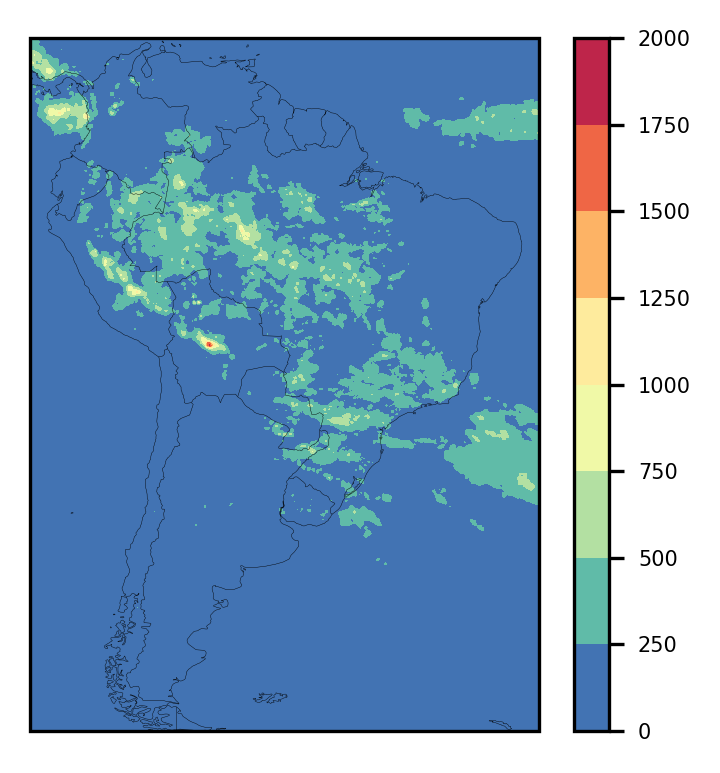

In [6]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(3,3),dpi=300)
gs = gridspec.GridSpec(1,1)

#==================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')
a1 = ax1.contourf(lon2d, lat2d, np.nansum(DAILY.data,axis=0), cmap='Spectral_r')
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, aspect=20)
cbar.ax.tick_params(labelsize=5)

In [7]:
sys.exit()

SystemExit: 

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Concat all daily files

In [8]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Brazil','GSMaP')

In [9]:
list_files = glob.glob(os.path.join(dir_base,'MVK','daily','*.nc'))
list_files = sorted(list_files)
list_len = len(list_files)
print(f'Number of files: {list_len}')

Number of files: 12


In [38]:
DATA = xr.open_mfdataset(list_files, combine='by_coords')

In [39]:
# DATA = DATA.sel(lat=slice(-55, 6))

In [40]:
lon2d, lat2d = np.meshgrid(DATA.lon, DATA.lat[::-1])

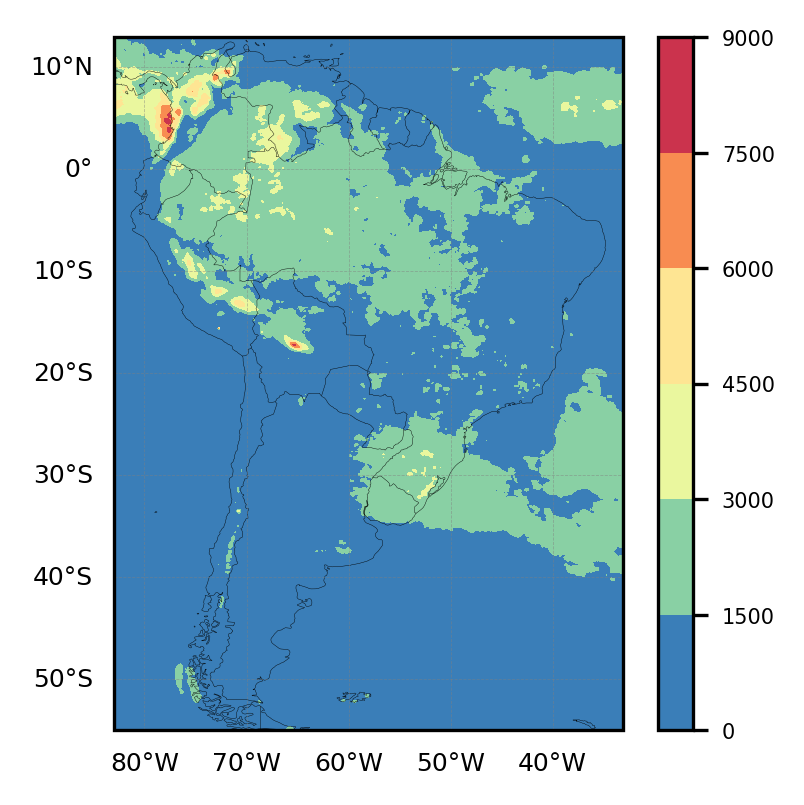

In [41]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(3,3),dpi=300)
gs = gridspec.GridSpec(1,1)

#==================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')
a1 = ax1.contourf(lon2d, lat2d, np.nansum(DATA.PRE.values,axis=0), cmap='Spectral_r')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, aspect=20)
cbar.ax.tick_params(labelsize=5)

In [17]:
DATA

<xarray.Dataset> Size: 447MB
Dimensions:  (time: 366, lat: 610, lon: 500)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
  * lat      (lat) float64 5kB -55.0 -54.9 -54.8 -54.7 -54.6 ... 5.6 5.7 5.8 5.9
  * lon      (lon) float64 4kB -83.0 -82.9 -82.8 -82.7 ... -33.3 -33.2 -33.1
Data variables:
    PRE      (time, lat, lon) float32 447MB dask.array<chunksize=(31, 610, 500), meta=np.ndarray>
Attributes:
    description:  Daily GSMaP-MVK precipitation forin SA

In [ ]:
PRE_xr = xr.Dataset(data_vars={"PRE": (("time","lat","lon"), DATA)},
                        coords={'time': TIME_REF, 'lat': DATA.lat, 'lon': DATA.lon},
                        attrs=dict(description=f'Daily GSMaP-MVK 1 hour precipitation for days in month 2024/{month} in SA',))

PRE_xr.PRE.attrs["units"] = "mm/h"
PRE_xr.PRE.attrs["long_name"] = "precipitation"
PRE_xr.PRE.attrs["origname"] = "precipitation"

PRE_xr.lat.attrs["units"] = "degrees_north"
PRE_xr.lat.attrs["long_name"] = "Latitude"

PRE_xr.lon.attrs["units"] = "degrees_east"
PRE_xr.lon.attrs["long_name"] = "Longitude"

In [13]:
PRE_out = os.path.join('/','media','arturo','Arturo','Data','Brazil','GSMaP', 'MVK', f'GSMaP_MVK_SA_1dy_2024_01_01_2024_12_31.nc')
print(f'Export PRE data to {PRE_out}')
DATA.to_netcdf(PRE_out)

Export PRE data to /media/arturo/Arturo/Data/Brazil/GSMaP/MVK/GSMaP_MVK_SA_1dy_2024_01_01_2024_12_31.nc
